In [19]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [26]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

education_df = pd.read_sql_query("select * from useducation", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

#### Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [27]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


<IPython.core.display.Javascript object>

In [28]:
print(education_df.shape, "\n")
education_df.info()

(1492, 25) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   flo

<IPython.core.display.Javascript object>

In [29]:
education_nulls = education_df.isnull().mean().sort_values(ascending=True)
bad_cols = [i for i, v in education_nulls.iteritems() if v != 0]
states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, bad_cols] = education_df.loc[
        education_df["STATE"] == state, bad_cols
    ].interpolate()

education_df = education_df.dropna()

<IPython.core.display.Javascript object>

In [30]:
education_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
54,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,57701.0,53500.0,37614.0,461398.0,182737.0,647299.0,215.834434,265.993417,206.291984,262.448330
55,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,280280.0,125801.0,407329.0,211.616130,257.647254,208.685273,266.423396
57,1993_COLORADO,COLORADO,1993,539538.0,3058326.0,147793.0,1242337.0,1668196.0,3028305.0,1537714.0,...,50807.0,47665.0,34770.0,403871.0,164260.0,575380.0,222.219036,273.200878,215.523979,266.856804
58,1993_CONNECTICUT,CONNECTICUT,1993,471918.0,4064158.0,149204.0,1433539.0,2481415.0,4079943.0,2302852.0,...,39093.0,34662.0,27979.0,310022.0,127655.0,443893.0,228.105503,275.202320,224.712775,264.457874
59,1993_DELAWARE,DELAWARE,1993,104355.0,683954.0,44497.0,443250.0,196207.0,694534.0,394680.0,...,8285.0,8265.0,5882.0,67899.0,28930.0,97394.0,217.181255,263.834857,207.792430,262.255809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1192648.0,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1007338.0,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,257289.0,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,809722.0,240.389213,288.143144,219.612694,258.700304


<IPython.core.display.Javascript object>

In [31]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,...,1046.000000,1046.000000,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000
mean,2006.970363,9.312498e+05,1.016897e+07,8.849582e+05,4.715139e+06,4.568873e+06,1.025869e+07,5.302625e+06,2.997572e+06,4.659259e+05,...,71534.228967,71677.377629,62567.048279,5.751591e+05,2.797579e+05,8.764167e+05,235.269162,278.747113,219.099817,263.615681
std,6.242782,1.104296e+06,1.288751e+07,1.261405e+06,6.105385e+06,5.989616e+06,1.308992e+07,6.879720e+06,3.665806e+06,5.757227e+05,...,85272.286001,84302.592122,74919.819069,6.824060e+05,3.325605e+05,1.040403e+06,9.632646,9.912572,7.804302,5.768169
min,1993.000000,4.386600e+04,6.559710e+05,4.062200e+04,0.000000e+00,2.853100e+04,6.578090e+05,2.834840e+05,1.695450e+05,2.263600e+04,...,2548.000000,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,187.134670,232.831510,179.324956,236.379102
25%,2002.000000,2.743105e+05,2.571806e+06,2.323988e+05,1.384262e+06,9.253550e+05,2.537691e+06,1.347766e+06,7.685512e+05,1.147892e+05,...,20166.750000,20564.750000,18304.000000,1.649732e+05,8.084075e+04,2.573745e+05,230.660761,273.383577,214.943439,259.956991
50%,2007.000000,6.638440e+05,5.842360e+06,4.945290e+05,2.906463e+06,2.335014e+06,5.959529e+06,2.999999e+06,1.776351e+06,3.029990e+05,...,50695.000000,49774.000000,40743.000000,4.052340e+05,1.859055e+05,6.232765e+05,237.041971,280.862695,220.962973,264.517851
75%,2012.000000,1.008680e+06,1.170678e+07,9.548370e+05,5.892033e+06,5.193129e+06,1.150621e+07,5.971732e+06,3.520381e+06,5.473685e+05,...,78924.000000,80671.250000,72551.000000,6.372388e+05,3.166840e+05,9.682915e+05,241.940254,285.257700,224.164324,267.663197
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


<IPython.core.display.Javascript object>

Math scores are on average higher than reading. Average revenue is less than average expenditure.

#### Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

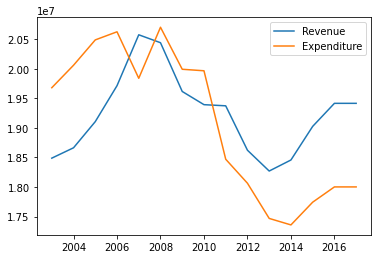

<IPython.core.display.Javascript object>

In [36]:
plt.plot(
    education_df.loc[education_df["STATE"] == "MICHIGAN", "YEAR"],
    education_df.loc[education_df["STATE"] == "MICHIGAN", "TOTAL_REVENUE"],
    label="Revenue",
)
plt.plot(
    education_df.loc[education_df["STATE"] == "MICHIGAN", "YEAR"],
    education_df.loc[education_df["STATE"] == "MICHIGAN", "TOTAL_EXPENDITURE"],
    label="Expenditure",
)
plt.legend()
plt.show()

#### In your chosen state, which of the lessons are the students more successful, math or reading?

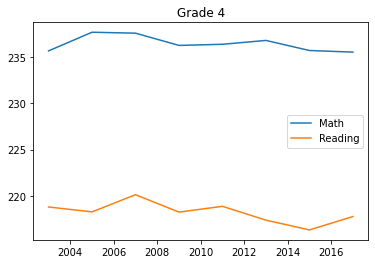

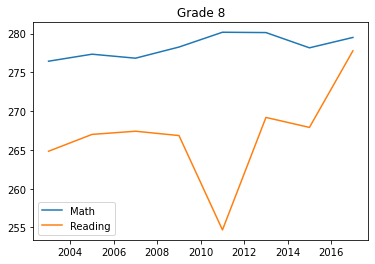

<IPython.core.display.Javascript object>

In [43]:
plt.plot(
    education_df.loc[education_df["STATE"] == "MICHIGAN", "YEAR"],
    education_df.loc[education_df["STATE"] == "MICHIGAN", "AVG_MATH_4_SCORE"],
    label="Math",
)
plt.plot(
    education_df.loc[education_df["STATE"] == "MICHIGAN", "YEAR"],
    education_df.loc[education_df["STATE"] == "MICHIGAN", "AVG_READING_4_SCORE"],
    label="Reading",
)
plt.title("Grade 4")
plt.legend()
plt.show()

plt.plot(
    education_df.loc[education_df["STATE"] == "MICHIGAN", "YEAR"],
    education_df.loc[education_df["STATE"] == "MICHIGAN", "AVG_MATH_8_SCORE"],
    label="Math",
)
plt.plot(
    education_df.loc[education_df["STATE"] == "MICHIGAN", "YEAR"],
    education_df.loc[education_df["STATE"] == "MICHIGAN", "AVG_READING_8_SCORE"],
    label="Reading",
)
plt.title("Grade 8")
plt.legend()
plt.show()

#### What are the distributions of the math and reading scores in the sample?

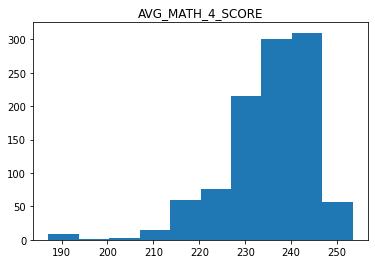

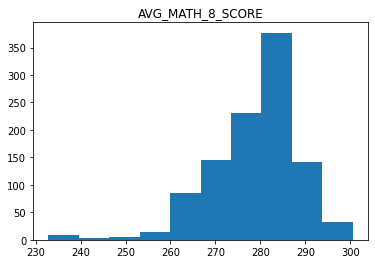

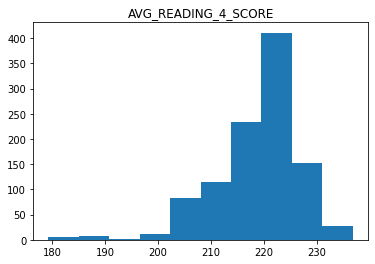

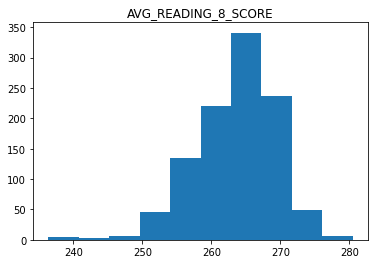

<IPython.core.display.Javascript object>

In [46]:
count = 1
for i in [
    "AVG_MATH_4_SCORE",
    "AVG_MATH_8_SCORE",
    "AVG_READING_4_SCORE",
    "AVG_READING_8_SCORE",
]:
    plt.hist(education_df[i])
    plt.title(i)
    plt.show()

#### Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [48]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

education_df = pd.read_sql_query("select * from useducation", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

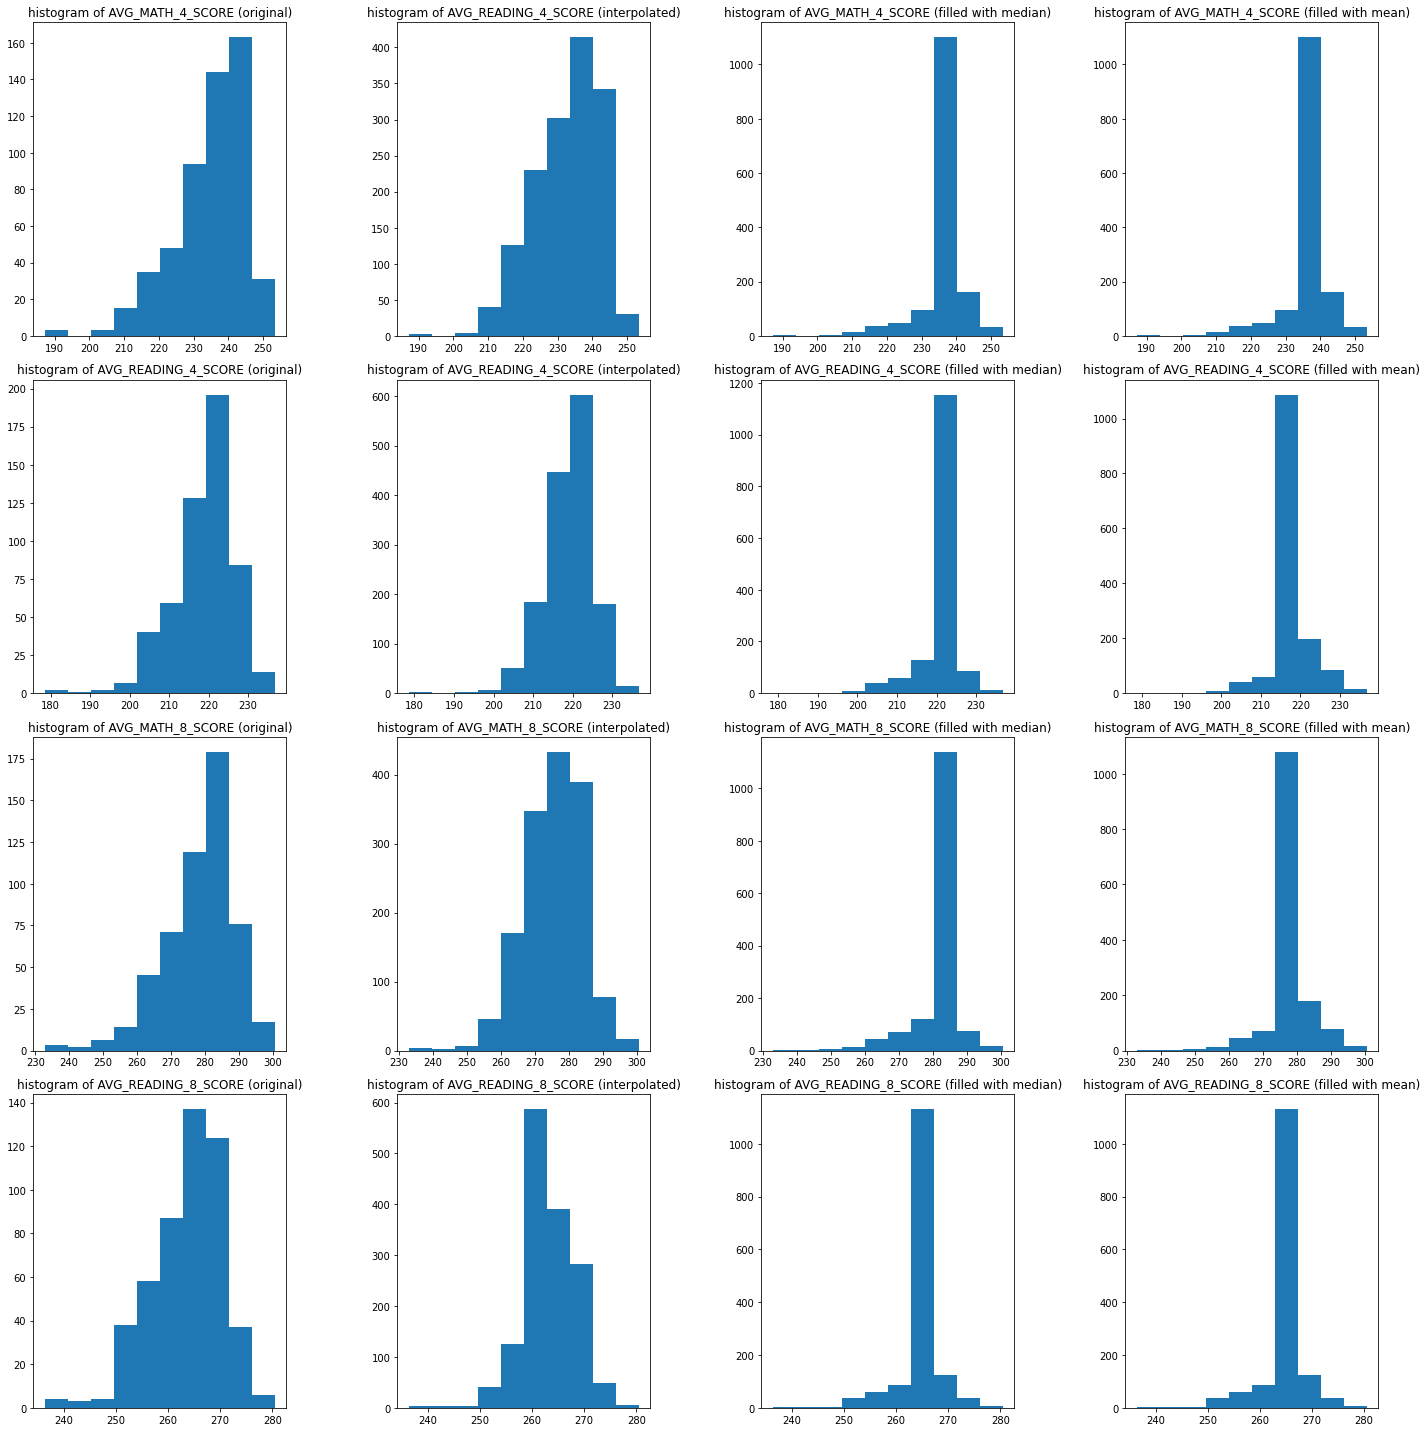

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4, 4, 2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4, 4, 3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4, 4, 4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4, 4, 5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4, 4, 6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4, 4, 7)
plt.hist(
    education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median())
)
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4, 4, 8)
plt.hist(
    education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean())
)
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4, 4, 9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4, 4, 10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4, 4, 11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4, 4, 12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4, 4, 13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4, 4, 14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4, 4, 15)
plt.hist(
    education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median())
)
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4, 4, 16)
plt.hist(
    education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean())
)
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()